(240, 320, 3)
240 320
(240, 320)


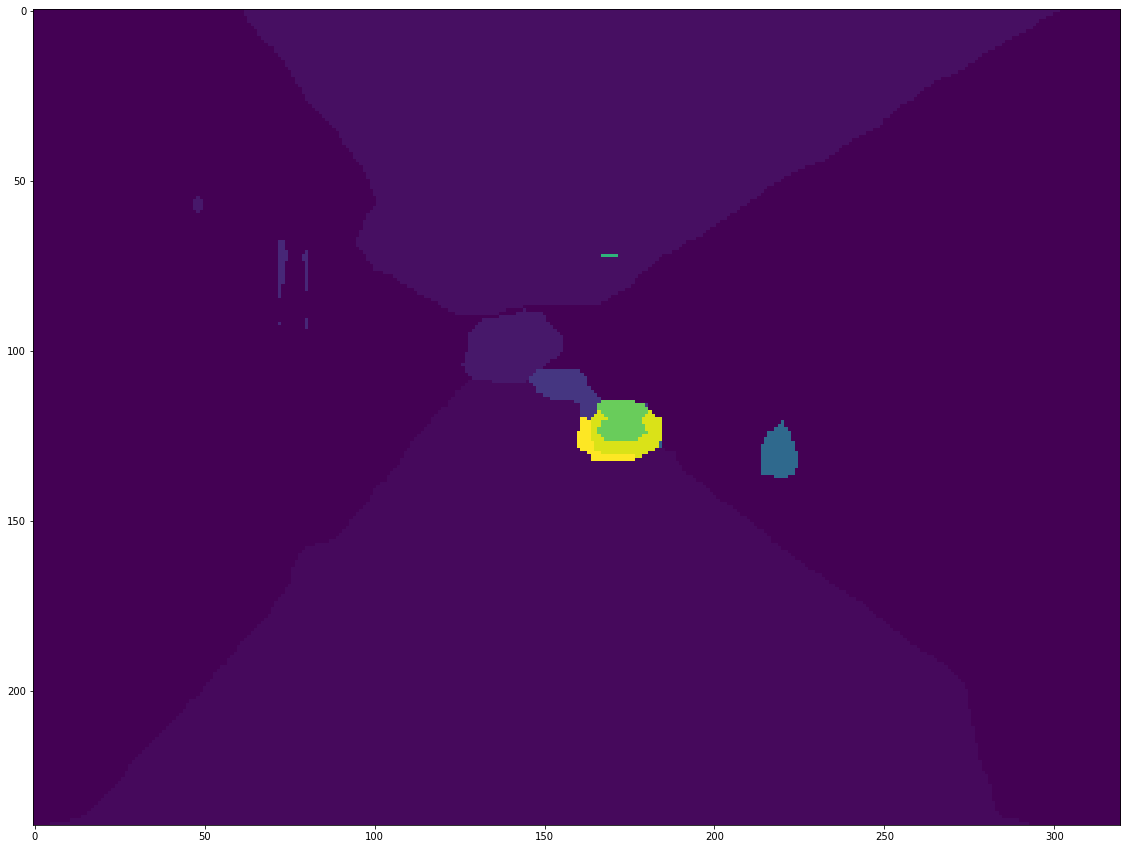

In [12]:
import requests, json, cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

URL = 'http://143.248.94.189:35005/api/predict'

img_path = './data/target.jpg'
im1 = cv2.imread(img_path)

rNum = 240
cNum = 320

if im1.shape != [rNum,cNum]:
    im1 = cv2.resize(im1, (cNum, rNum))

im1=cv2.cvtColor(im1, cv2.COLOR_RGB2BGR)
print(im1.shape)


strImgTest = '['
for c in range(3):
    for h in range(rNum):
        for w in range(cNum):
            strImgTest+=str(im1[h][w][c])
            if c!=2 or h!= rNum-1 or w != cNum-1:
                strImgTest+=','
strImgTest+=']'

#plt.figure(figsize=(20, 15))
#plt.imshow(img)
#plt.show()

res = requests.post(url=URL, data={'image':strImgTest, 'w':cNum, 'h':rNum})

param = json.loads(res.text)
seg_res = param['seg_label']
res_w = param['w']
res_h = param['h']
print(res_h, res_w)
seg_array = np.array(seg_res, dtype=np.uint8)
print(seg_array.shape)
seg_img = Image.fromarray(seg_array)
plt.figure(figsize=(20, 15))
plt.imshow(seg_img)